                        m     TagName  Unnamed: 2
0     2008-07-01 00:00:00          c#           3
1     2008-08-01 00:00:00    assembly           8
2     2008-08-01 00:00:00  javascript         162
3     2008-08-01 00:00:00           c          85
4     2008-08-01 00:00:00      python         124
...                   ...         ...         ...
1986  2020-07-01 00:00:00           r        5694
1987  2020-07-01 00:00:00          go         743
1988  2020-07-01 00:00:00        ruby         775
1989  2020-07-01 00:00:00        perl         182
1990  2020-07-01 00:00:00       swift        3607

[1991 rows x 3 columns]
(1991, 3)
                     m     TagName  Unnamed: 2
0  2008-07-01 00:00:00          c#           3
1  2008-08-01 00:00:00    assembly           8
2  2008-08-01 00:00:00  javascript         162
3  2008-08-01 00:00:00           c          85
4  2008-08-01 00:00:00      python         124
                        m TagName  Unnamed: 2
1986  2020-07-01 00:00:00       r    

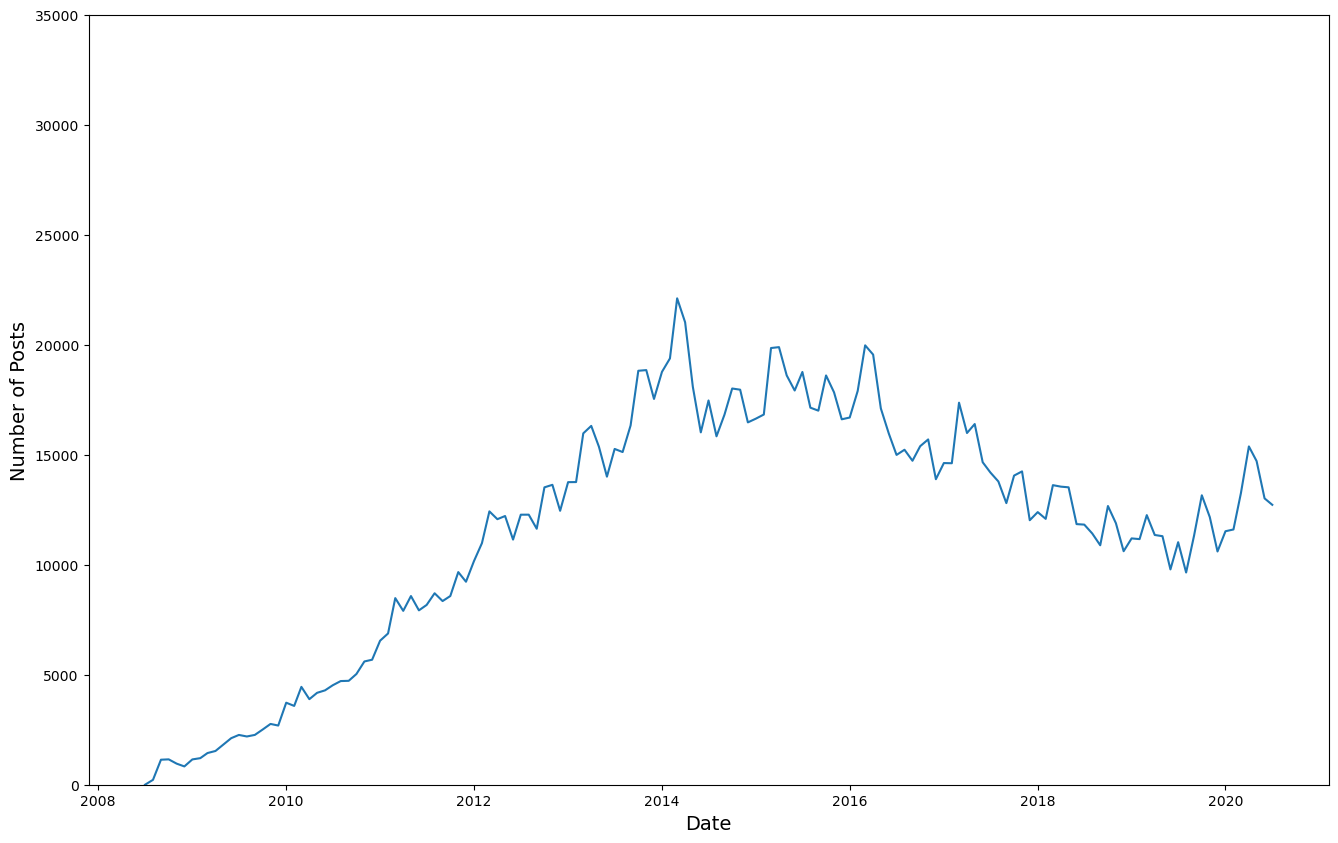

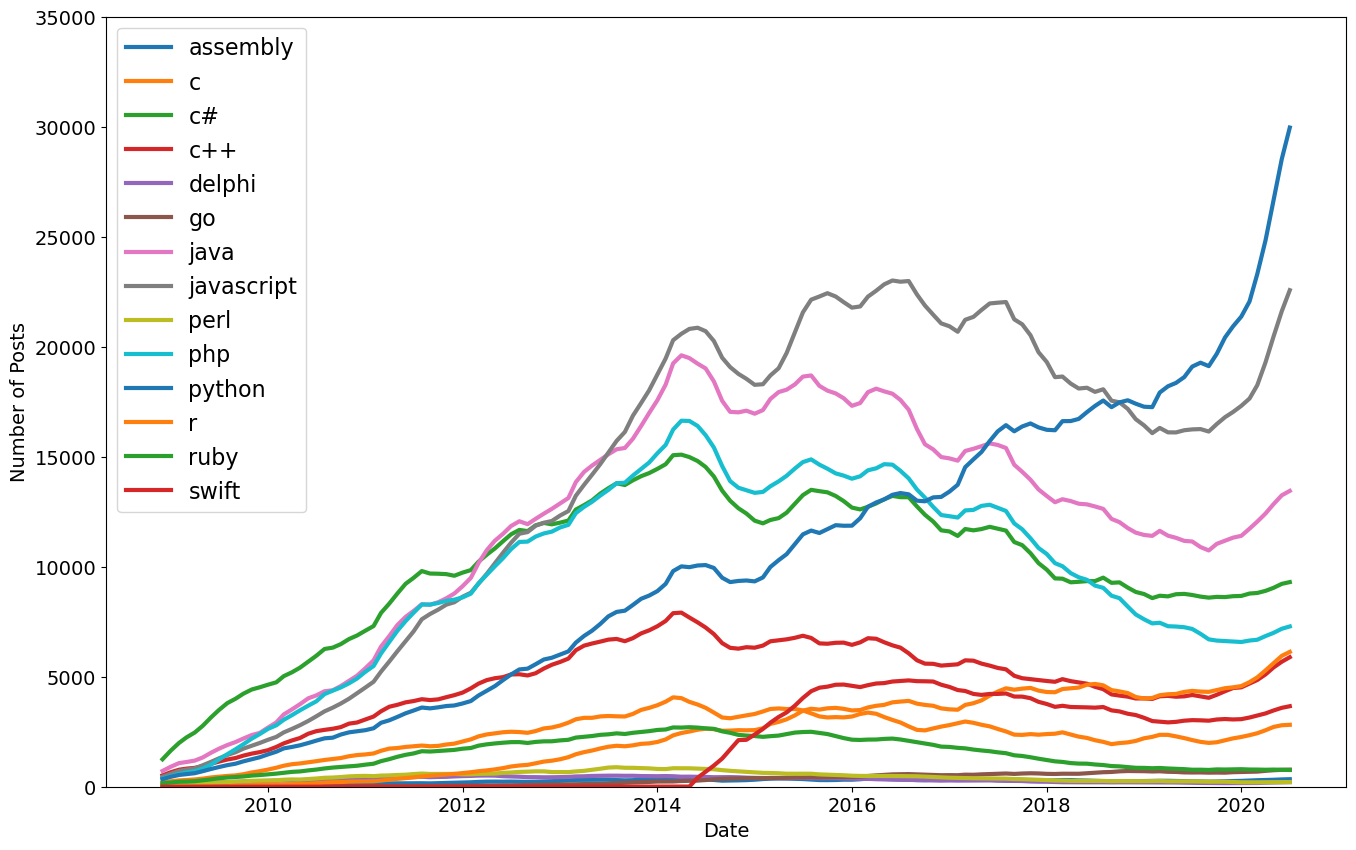

In [65]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

data = pd.read_csv("QueryResults.csv")
print(data)


print(data.shape)
print(data.head(5))
print(data.tail(5))

data['Unnamed: 2'].max()
data['Unnamed: 2'].idxmax()

Highest_entry = data['m'].loc[1958]
print(Highest_entry )

Totalpost = data.groupby("TagName").sum()
print(Totalpost)
max_tag = Totalpost['Unnamed: 2'].idxmax()
max_value = Totalpost['Unnamed: 2'].max()
print(max_tag)
print(max_value)
print(f"Tag with max posts: {max_tag}, Posts: {max_value}")

data['m'] = pd.to_datetime(data['m']).dt.date

print(data)

data['m'] = pd.to_datetime(data['m'])

min_Date = data['m'].min()
min_idx = data['m'].idxmin()
max_date = data['m'].max()
max_idx = data['m'].idxmax()

print("Earliest date:", min_Date, "at index:", min_idx)
print("Latest date:", max_date, "at index:", max_idx)

Lowest_date_entry = data.loc[0]
print(Lowest_date_entry )
Highest_date_entry = data.loc[1977]
print(Highest_date_entry )

reshaped_df = data.pivot(index='m', columns='TagName', values='Unnamed: 2')
reshaped_df.columns
print(reshaped_df)
#Filling zeros for NAN Values
reshaped_df.fillna(0, inplace=True) 
reshaped_df.fillna(0)

#Rechecking if there is anymore NAN Values

reshaped_df.isna().any()

plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

#To plot for sperate data like java or python

#plt.plot(reshaped_df.index, reshaped_df.java)
#plt.plot(reshaped_df.index, reshaped_df.python)

#To plot for all columns after using rolling average to smooth the data 

roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)



